<a href="https://colab.research.google.com/github/UetaKento/Aizu_NLP/blob/main/Ex5_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from __future__ import division  # Python 2 users only
import nltk, re, pprint
from nltk import word_tokenize
nltk.download('all')

In [ ]:
"""
(1)
"""
tagged_words = nltk.corpus.brown.tagged_words(tagset='universal') # tagged_wordsはtuple型でwordとtagがセットになっている。
dict_tagged_words = dict(tagged_words[:50]) # tagged_wordsをdict型へ
print(dict_tagged_words)
sorted(set(dict_tagged_words.values()))

{'The': 'DET', 'Fulton': 'NOUN', 'County': 'NOUN', 'Grand': 'ADJ', 'Jury': 'NOUN', 'said': 'VERB', 'Friday': 'NOUN', 'an': 'DET', 'investigation': 'NOUN', 'of': 'ADP', "Atlanta's": 'NOUN', 'recent': 'ADJ', 'primary': 'NOUN', 'election': 'NOUN', 'produced': 'VERB', '``': '.', 'no': 'DET', 'evidence': 'NOUN', "''": '.', 'that': 'ADP', 'any': 'DET', 'irregularities': 'NOUN', 'took': 'VERB', 'place': 'NOUN', '.': '.', 'jury': 'NOUN', 'further': 'ADV', 'in': 'ADP', 'term-end': 'NOUN', 'presentments': 'NOUN', 'the': 'DET', 'City': 'NOUN', 'Executive': 'ADJ', 'Committee': 'NOUN', ',': '.', 'which': 'DET', 'had': 'VERB', 'over-all': 'ADJ', 'charge': 'NOUN', 'deserves': 'VERB', 'praise': 'NOUN'}


['.', 'ADJ', 'ADP', 'ADV', 'DET', 'NOUN', 'VERB']

In [ ]:
from collections import defaultdict
counts = defaultdict(int)
from nltk.corpus import brown
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1
from operator import itemgetter
print(sorted(counts.items(), key=itemgetter(1), reverse=True))

In [ ]:
"""
(2)
単語1つ1つにタグがついているものと考えると、Bigramはある単語とその1つ前の単語との並びで、その2つのタグを決める。
「to」で考えてみる。toには前置詞の使い方と不定詞の使い方がある。
A: I walk to school. のtoは前置詞のtoであり、前置詞のtoの後には名詞が続く。
B: To walk is fun. のtoは不定詞のtoであり、不定詞のtoの後には動詞が続く。
もし、Aでトレーニングしていた場合、「to」+名詞でタグが付けられるが、Bの文字列が来たときはそれに当てはまらないのでタグがNoneになる。
"""


In [ ]:
"""
(3)
"""
from nltk.corpus import brown
news_text = brown.words(categories='news')

fdist = nltk.FreqDist([w.lower() for w in news_text])
dict_fdist = dict(fdist)
dict_fdist2 = {}
dict_fdist3 = {}

for k,v in dict_fdist.items():
  if v <= 2:
    k = 'UNK'
    dict_fdist2[k] = v
  elif v > 2:
    dict_fdist3[k] = v
print(len(dict_fdist2) , len(dict_fdist3))
dict_fdist2
# print(len(dict_fdist))
# sorted(dict_fdist.values(), reverse=True)
# fdist.hapaxes()
# sorted(fdist.items())

1 4217


{'UNK': 1}

{'DET': 11389, 'NOUN': 30654, 'ADJ': 6706, 'VERB': 14399, 'ADP': 12355, '.': 11928, 'ADV': 3349, 'CONJ': 2717, 'PRT': 2264, 'PRON': 2535, 'NUM': 2166, 'X': 92}
100554


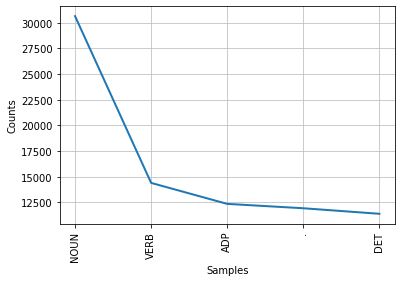

In [ ]:
from nltk.corpus import brown
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
dict_tag_fd = dict(tag_fd)
print(dict_tag_fd)
print(tag_fd.N())
tag_fd.plot(5)

In [ ]:
import matplotlib.pyplot as plt
left = [1, 2, 3, 4, 5,]
height = [dict_tag_fd['NOUN']/tag_fd.N(), dict_tag_fd['VERB']/tag_fd.N(),
          dict_tag_fd['ADP']/tag_fd.N(), dict_tag_fd['.']/tag_fd.N(), 
          dict_tag_fd['DET']/tag_fd.N()]
labels = ['NOUN', 'VERB', 'ADP', '.', 'DET']
 
plt.bar(left, height, width=0.5, color='#0096c8',
        edgecolor='b', linewidth=2, tick_label=labels)
plt.show()

NameError: ignored

In [ ]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)
print(brown_news_tagged)
tuple_word_tag_pairs = tuple(word_tag_pairs)
print(tuple_word_tag_pairs[:100])
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] == 'NOUN']
print(len(noun_preceders))
fdist = nltk.FreqDist(noun_preceders)

[('The', 'DET'), ('Fulton', 'NOUN'), ...]
((('The', 'DET'), ('Fulton', 'NOUN')), (('Fulton', 'NOUN'), ('County', 'NOUN')), (('County', 'NOUN'), ('Grand', 'ADJ')), (('Grand', 'ADJ'), ('Jury', 'NOUN')), (('Jury', 'NOUN'), ('said', 'VERB')), (('said', 'VERB'), ('Friday', 'NOUN')), (('Friday', 'NOUN'), ('an', 'DET')), (('an', 'DET'), ('investigation', 'NOUN')), (('investigation', 'NOUN'), ('of', 'ADP')), (('of', 'ADP'), ("Atlanta's", 'NOUN')), (("Atlanta's", 'NOUN'), ('recent', 'ADJ')), (('recent', 'ADJ'), ('primary', 'NOUN')), (('primary', 'NOUN'), ('election', 'NOUN')), (('election', 'NOUN'), ('produced', 'VERB')), (('produced', 'VERB'), ('``', '.')), (('``', '.'), ('no', 'DET')), (('no', 'DET'), ('evidence', 'NOUN')), (('evidence', 'NOUN'), ("''", '.')), (("''", '.'), ('that', 'ADP')), (('that', 'ADP'), ('any', 'DET')), (('any', 'DET'), ('irregularities', 'NOUN')), (('irregularities', 'NOUN'), ('took', 'VERB')), (('took', 'VERB'), ('place', 'NOUN')), (('place', 'NOUN'), ('.', '.')), (('

In [ ]:
from nltk.corpus import brown
from collections import defaultdict
brown_news_tagged = brown.tagged_words(categories='news')
brown_news_tagged_fd = nltk.FreqDist(brown_news_tagged)
print(brown_news_tagged_fd.most_common(1000))

tuple_1000 = [word for (word, _) in brown_news_tagged_fd.most_common(1000)]
print(tuple_1000)

mapping = defaultdict(lambda: 'UNK')
for (v,k) in tuple_1000:
    mapping[v] = v

print(mapping.items())
brown_news_tagged2 = [(mapping[k],v) for (k,v) in brown_news_tagged]
print(brown_news_tagged2)
print(len(brown_news_tagged2))

[(('the', 'AT'), 5558), ((',', ','), 5133), (('.', '.'), 4012), (('of', 'IN'), 2716), (('and', 'CC'), 2115), (('a', 'AT'), 1988), (('in', 'IN'), 1828), (('to', 'TO'), 1222), (('for', 'IN'), 905), (('to', 'IN'), 880), (('The', 'AT'), 775), (('``', '``'), 732), (('is', 'BEZ'), 729), (('was', 'BEDZ'), 716), (("''", "''"), 702), (('on', 'IN'), 614), (('at', 'IN'), 594), (('that', 'CS'), 545), (('with', 'IN'), 542), (('be', 'BE'), 525), (('by', 'IN'), 493), (('he', 'PPS'), 451), (('his', 'PP$'), 398), (('as', 'CS'), 392), (('will', 'MD'), 387), (('said', 'VBD'), 382), (('from', 'IN'), 340), (('are', 'BER'), 327), ((';', '.'), 314), (('an', 'AT'), 300), (('has', 'HVZ'), 300), (('--', '--'), 300), (('who', 'WPS'), 268), (('have', 'HV'), 265), (('had', 'HVD'), 260), (('not', '*'), 253), (('Mrs.', 'NP'), 252), (('were', 'BED'), 252), (('this', 'DT'), 249), (('which', 'WDT'), 244), (('would', 'MD'), 243), (('it', 'PPS'), 222), (('their', 'PP$'), 219), (('been', 'BEN'), 212), (('they', 'PPSS'), 2

In [ ]:
from nltk.corpus import brown
from collections import defaultdict
brown_tagged_words = brown.tagged_words(categories='news') 
brown_tagged_sents = brown.tagged_sents(categories='news') # タグ付きデータ
brown_sents = brown.sents(categories='news') # タグ無データ（同一文）

brown_tagged_words_fd = nltk.FreqDist(brown_tagged_words)
print(brown_tagged_words_fd.most_common(1000))

tuple_1000 = [word for (word, _) in brown_tagged_words_fd.most_common(1000)]
print(tuple_1000)

mapping = defaultdict(lambda: 'UNK')
for (v,k) in tuple_1000:
    mapping[v] = v

# for i in range(len(brown_tagged_sents)):
#   for (k,v) in brown_tagged_sents[i]:
#     (k,v) = (mapping[k],v)

# for i in range(len(brown_tagged_sents)):
#   for j in range(len(brown_tagged_sents[i])):
#     brown_tagged_sents[i][j]
# brown_tagged_sents_version2 = [(0,0),(0,0)]

# for i in range(3):
#   for j in range(len(brown_tagged_sents[i])):
#     list_brown_tagged_sents[i][j] = list(brown_tagged_sents[i][j])
#     list_brown_tagged_sents[i][j] = (mapping[brown_tagged_sents[i][j][0]], brown_tagged_sents[i][j][1])
#     brown_tagged_sents[i][j] = tuple(list_brown_tagged_sents[i][j])
T4L = []
list_brown_tagged_sents = []
list_brown_tagged_sents_v2 = []

for i in range(len(brown_tagged_sents)):
  for j in range(len(brown_tagged_sents[i])):
    T4L = list(brown_tagged_sents[i][j])
    T4L[0] = mapping[T4L[0]]
    list_brown_tagged_sents.append(tuple(T4L))
  list_brown_tagged_sents_v2.append(list_brown_tagged_sents)
  # brown_tagged_sents[i]=list_brown_tagged_sents_v2[i]
  list_brown_tagged_sents = []

size = int(len(list_brown_tagged_sents_v2) * 0.9)
print(size)

train_sents =  list_brown_tagged_sents_v2[:size]
test_sents = list_brown_tagged_sents_v2[size:]

print()
bigram_tagger = nltk.BigramTagger(train_sents)
print(bigram_tagger.tag(brown_sents[2007]))

unseen_sent = brown_sents[4203]
print(bigram_tagger.tag(unseen_sent))

print(bigram_tagger.evaluate(test_sents))

[(('the', 'AT'), 5558), ((',', ','), 5133), (('.', '.'), 4012), (('of', 'IN'), 2716), (('and', 'CC'), 2115), (('a', 'AT'), 1988), (('in', 'IN'), 1828), (('to', 'TO'), 1222), (('for', 'IN'), 905), (('to', 'IN'), 880), (('The', 'AT'), 775), (('``', '``'), 732), (('is', 'BEZ'), 729), (('was', 'BEDZ'), 716), (("''", "''"), 702), (('on', 'IN'), 614), (('at', 'IN'), 594), (('that', 'CS'), 545), (('with', 'IN'), 542), (('be', 'BE'), 525), (('by', 'IN'), 493), (('he', 'PPS'), 451), (('his', 'PP$'), 398), (('as', 'CS'), 392), (('will', 'MD'), 387), (('said', 'VBD'), 382), (('from', 'IN'), 340), (('are', 'BER'), 327), ((';', '.'), 314), (('an', 'AT'), 300), (('has', 'HVZ'), 300), (('--', '--'), 300), (('who', 'WPS'), 268), (('have', 'HV'), 265), (('had', 'HVD'), 260), (('not', '*'), 253), (('Mrs.', 'NP'), 252), (('were', 'BED'), 252), (('this', 'DT'), 249), (('which', 'WDT'), 244), (('would', 'MD'), 243), (('it', 'PPS'), 222), (('their', 'PP$'), 219), (('been', 'BEN'), 212), (('they', 'PPSS'), 2

[(('the', 'AT'), 5558), ((',', ','), 5133), (('.', '.'), 4012), (('of', 'IN'), 2716), (('and', 'CC'), 2115), (('a', 'AT'), 1988), (('in', 'IN'), 1828), (('to', 'TO'), 1222), (('for', 'IN'), 905), (('to', 'IN'), 880), (('The', 'AT'), 775), (('``', '``'), 732), (('is', 'BEZ'), 729), (('was', 'BEDZ'), 716), (("''", "''"), 702), (('on', 'IN'), 614), (('at', 'IN'), 594), (('that', 'CS'), 545), (('with', 'IN'), 542), (('be', 'BE'), 525), (('by', 'IN'), 493), (('he', 'PPS'), 451), (('his', 'PP$'), 398), (('as', 'CS'), 392), (('will', 'MD'), 387), (('said', 'VBD'), 382), (('from', 'IN'), 340), (('are', 'BER'), 327), ((';', '.'), 314), (('an', 'AT'), 300), (('has', 'HVZ'), 300), (('--', '--'), 300), (('who', 'WPS'), 268), (('have', 'HV'), 265), (('had', 'HVD'), 260), (('not', '*'), 253), (('Mrs.', 'NP'), 252), (('were', 'BED'), 252), (('this', 'DT'), 249), (('which', 'WDT'), 244), (('would', 'MD'), 243), (('it', 'PPS'), 222), (('their', 'PP$'), 219), (('been', 'BEN'), 212), (('they', 'PPSS'), 2

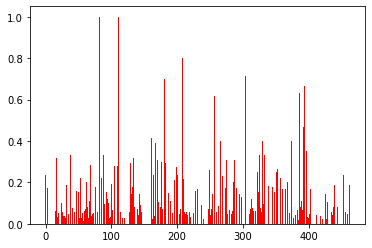

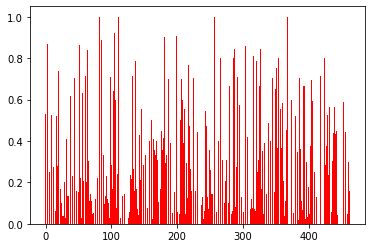

In [ ]:
from nltk.corpus import brown
from collections import defaultdict
brown_tagged_words = brown.tagged_words(categories='news') 
brown_tagged_sents = brown.tagged_sents(categories='news')
brown_sents = brown.sents(categories='news')
T4L = []
list_brown_tagged_sents = []
list_brown_tagged_sents_v2 = []

brown_tagged_words_fd = nltk.FreqDist(brown_tagged_words) # 単語の頻度を考えるためFreqDistを使う。
print(brown_tagged_words_fd.most_common(1000)) # 最頻出の1000単語を表示。

tuple_1000 = [word for (word, _) in brown_tagged_words_fd.most_common(1000)] # brown_tagged_words_fd.most_common(1000)は最頻出1000単語の(('単語', 'タグ'), 出現回数)のタプルになっているので、('単語', 'タグ')にする。
#print(tuple_1000) 

mapping = defaultdict(lambda: 'UNK') # 最頻出1000単語は'単語': '単語'になるようにし、それ以外の単語は'単語': 'UNK'になるようにdefaultdictとlambdaを使ってdict型のmappingを作る。
for (v,k) in tuple_1000:
    mapping[v] = v

for i in range(len(brown_tagged_sents)): # brown_tagged_sents[i]はi行目の単語とタグのtupleのlist。[(a,b),(c,d),....]
  for j in range(len(brown_tagged_sents[i])): # brown_tagged_sents[i][j]はi行j番目の単語とタグのtuple。(a,b)
    T4L = list(brown_tagged_sents[i][j]) # brown_tagged_sents[i][j]はtupleで、値の変更が出来ないのでlistに変える。
    T4L[0] = mapping[T4L[0]] # tuple(a,b)がlist[a,b]のように変わったのでlist[0]でaの値を変える。
    list_brown_tagged_sents.append(tuple(T4L)) # list型に変えたbrown_tagged_sents[i][j]をtupleに戻して、list_brown_tagged_sentsに追加。
  list_brown_tagged_sents_v2.append(list_brown_tagged_sents) # brown_tagged_sentsを表現するために、list_brown_tagged_sentsをlist_brown_tagged_sents_v2に追加。
  list_brown_tagged_sents = [] # これをすることで行の区切りを表す。

size = int(len(list_brown_tagged_sents_v2) * 0.9) # list_brown_tagged_sents_v2の90％にあたる、行のインデックスをsizeへ。
train_sents = brown_tagged_sents[:size]
test_sents = brown_tagged_sents[size:]
My_train_sents =  list_brown_tagged_sents_v2[:size] # list_brown_tagged_sents_v2の0%~90％をtrain_sentsに。
My_test_sents = list_brown_tagged_sents_v2[size:] # list_brown_tagged_sents_v2の90％~100%をtrain_sentsに。

bigram_tagger = nltk.BigramTagger(train_sents)
My_bigram_tagger = nltk.BigramTagger(My_train_sents)

print(bigram_tagger.evaluate(test_sents))
print(My_bigram_tagger.evaluate(My_test_sents))

squares = [bigram_tagger.evaluate(test_sents[i:i+1]) for i in range(len(test_sents))]
print(squares)

# print(list(range(len(My_test_sents))))
My_squares = [My_bigram_tagger.evaluate(My_test_sents[i:i+1]) for i in range(len(My_test_sents))]
print(My_squares)

import matplotlib.pyplot as plt
left = list(range(len(My_test_sents)))

height = [bigram_tagger.evaluate(test_sents[i:i+1]) for i in range(len(test_sents))]
 
plt.bar(left, height, color='r')

plt.show()

left = list(range(len(My_test_sents)))

height =  [My_bigram_tagger.evaluate(My_test_sents[i:i+1]) for i in range(len(My_test_sents))]
 
plt.bar(left, height, color='r')

plt.show()